#TOPIC: DIABETES PREDICTION DATASET
  POISE DATA SCIENCE PROJECT COHORT 4

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/saurabh00007/diabetescsv')

Skipping, found downloaded files in "./diabetescsv" (use force=True to force download)


username: mileye
kaggle key: d7f6760c73793d6b7f60f9edc443a18b

In [ ]:
!ls
# required datasets loaded from kaggle "diabetes.csv"

diabetescsv  sample_data


In [ ]:
import pandas as pd
import numpy as np
#importing necessary library to load the dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# Imports necessary liberaries for visualization

In [ ]:
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,5)
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

sns.set_style('darkgrid')
# Sets the styling that is to be used through out the analysis.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
diabetes = pd.read_csv('/content/diabetescsv/diabetes.csv')

# PROBLEM STATEMENT & OBJECTIVES

The diabetes dataset contains information about medical records of some sampled women in India. 

The datasets collects the following medical information listed below:
Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction : Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

The objective of the datasets is to predict based on diagnostic measurements whether a patient has diabetes or not.

# EXPLORATORY DATA  ANALYSIS OF THE DATASETS

In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
pd.DataFrame(diabetes.columns)
# shows the medical information collected for the sampled data

,0
0,Pregnancies
1,Glucose
2,BloodPressure
3,SkinThickness
4,Insulin
5,BMI
6,DiabetesPedigreeFunction
7,Age
8,Outcome


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This diabetes dataset contains 768 distinct entries and 9 columns out of which 8 are numeric columns except the Outcome data which is actually a categorical data but has been converted into numerical i.e 0(No) and 1(Yes).


Also we notice that our data has no null values which is good for a start in our preparation for the data for visualization and Analysis.

Let's check the distribution of entries in the Outcome columns.

In [ ]:
print(f"Entries with Yes : {diabetes[diabetes.Outcome==1].shape[0]}")
print(f"Entries with No : {diabetes[diabetes.Outcome==0].shape[0]}")

Entries with Yes : 268
Entries with No : 500


Text(0.5, 0, 'Outcome')

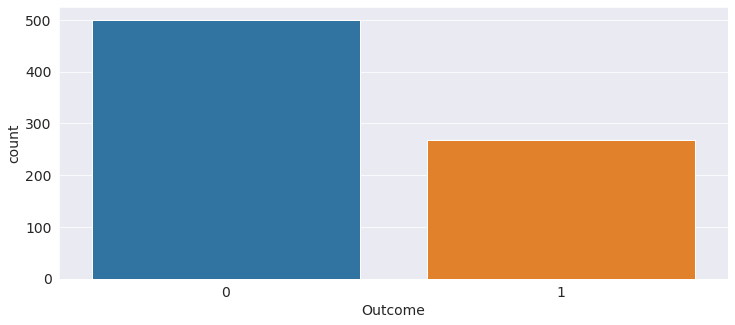

In [ ]:
sns.countplot(x = diabetes.Outcome)
plt.xlabel("Outcome")

There are more women who do not have diabetes in the population.

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the table above it can be observed that most columns in our dataset has outliers because of the high difference between the max and upper quartile which can be further shown using boxplot as shown below.


Text(655.5338235294118, 0.5, 'COunts in each group ')

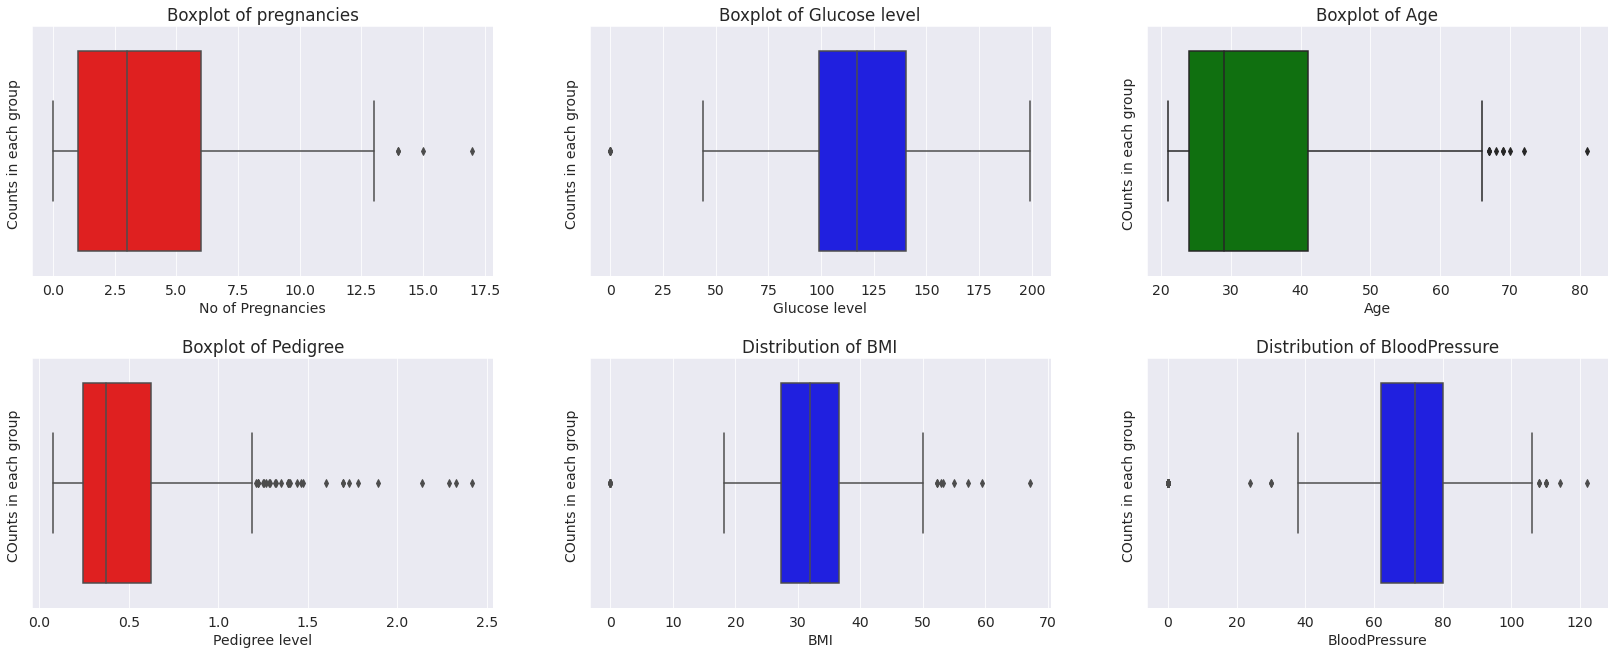

In [ ]:
fig, axes = plt.subplots(2,3, figsize= (24,10))
plt.tight_layout(pad = 4)

axes[0,0].set_title('Boxplot of pregnancies')
sns.boxplot(diabetes["Pregnancies"], color = 'r', ax= axes[0,0])
axes[0,0].set_xlabel('No of Pregnancies')
axes[0,0].set_ylabel('Counts in each group ')

axes[0,1].set_title('Boxplot of Glucose level')
sns.boxplot(diabetes["Glucose"], color= 'b', ax = axes[0,1])

axes[0,1].set_xlabel('Glucose level')
axes[0,1].set_ylabel('Counts in each group ')


axes[0,2].set_title('Boxplot of Age')
sns.boxplot(diabetes["Age"], color= 'g', ax = axes[0,2])
axes[0,2].set_xlabel('Age')
axes[0,2].set_ylabel('COunts in each group ')

axes[1,0].set_title('Boxplot of Pedigree')
sns.boxplot(diabetes["DiabetesPedigreeFunction"] , color= 'r', ax = axes[1,0])
axes[1,0].set_xlabel('Pedigree level')
axes[1,0].set_ylabel('COunts in each group ')


axes[1,2].set_title('Distribution of BloodPressure')
sns.boxplot(diabetes["BloodPressure"], color= 'b', ax = axes[1,2])
axes[1,2].set_xlabel('BloodPressure')
axes[1,2].set_ylabel('COunts in each group ')


axes[1,1].set_title('Distribution of BMI')
sns.boxplot(diabetes["BMI"], color= 'b', ax = axes[1,1])
axes[1,1].set_xlabel('BMI')
axes[1,1].set_ylabel('COunts in each group ')

# This shows the boxplot distribution of the columns that has some considerable correlation with the outcome column.

In the chart above we are using a boxplot so as to see the distribution of the data most especially looking at columns with respect to their outliers.

It can be observed that Columns such as Insulin, Pedigree have more outliers and BMI and Age also has some outliers while Glucoase and Pregnancy has little prescence of outliers.

Although the prescence of outliers might be the case of extreme cases as these are medical parameters.

Also, Most people interviewed are betwwen the age of 21-42 which infers that there's considerable population of young women who partake in the survey.

Most women interviewed have BMI between 18-50 and Pedigree level less than 1.5 whereas Blood Pressure Level seems to  have reasonable number of outliers on both end more like a normal distribution although we have some 0 bp level which only happens for dead organism.


Text(597.8568181818181, 0.5, 'Counts in each group ')

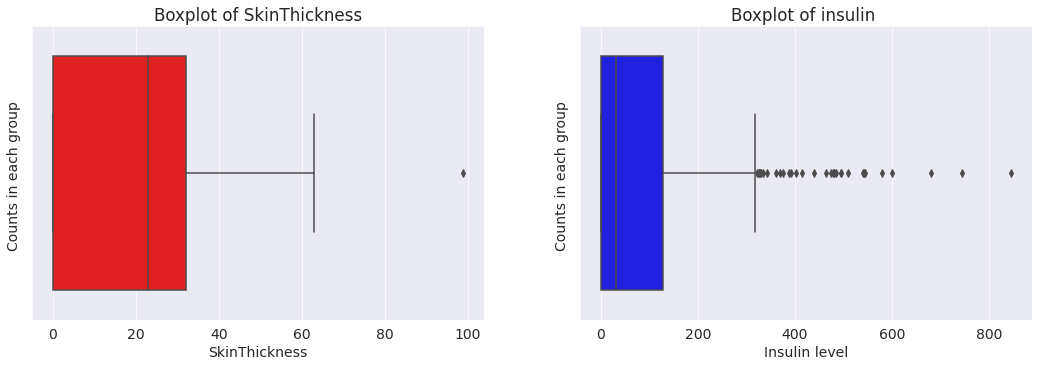

In [ ]:
fig, axes = plt.subplots(1,2, figsize= (16,6))
plt.tight_layout(pad = 4)


axes[0].set_title('Boxplot of SkinThickness')
sns.boxplot(diabetes["SkinThickness"], color = 'r', ax= axes[0])
axes[0].set_xlabel('SkinThickness')
axes[0].set_ylabel('Counts in each group ')

axes[1].set_title('Boxplot of insulin ')
sns.boxplot(diabetes["Insulin"], color= 'b', ax = axes[1])

axes[1].set_xlabel('Insulin level')
axes[1].set_ylabel('Counts in each group ')



Skinthickness has its minimum and first quartile has 0. Probably there was an issue of missing values and the were just recorded as zero because it's not possible in real life to have skin thickness 0.

Also we notice the minimum insulin level and first quartile is 0 which means that 25% of the population has no insulin in their body.

Also, We observe that all the datasets looks reasonable and valid(i.e no negative values and unreasonable value) but having 0 for BMI, Glucose, SkinThickness, Insulin and BloodPressure does not exist in real life situation so we will need to clean such entries.

As when bp or insulin level is 0 it could lead to death.

Next we check the unique values of these columns with  assumed discripancies.

In [ ]:
diabetes.BloodPressure.unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

This shows the distinct values recorded for blood pressure. since 0 is the only value that's not possible. we check the count of entries with 0 bp.

In [ ]:
print(f"zero bloodpressure count : {diabetes[diabetes.BloodPressure ==0].shape[0]}")

zero bloodpressure count : 35


In [ ]:
diabetes.Glucose.unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [ ]:
print(f"zero glucose count : {diabetes[diabetes.Glucose == 0].shape[0]}")

zero glucose count : 5


In [ ]:
diabetes.SkinThickness.unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [ ]:
print(f"zero skinthickness count : {diabetes[diabetes.SkinThickness == 0].shape[0]}")

zero skinthickness count : 227


In [ ]:
diabetes.BMI.unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [ ]:
print(f"zero BMI count : {diabetes[diabetes.BMI == 0].shape[0]}")

zero BMI count : 11


In [ ]:
diabetes.Insulin.unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [ ]:
print(f"zero Insulin count : {diabetes[diabetes.Insulin == 0].shape[0]}")

zero Insulin count : 374


We will clean all these entries with zero columns by replacing the zeros with the median of trheir respective columns. 
we picked the median because we observred that the columns have outliers.

In [ ]:
columns_to_replace= ['BloodPressure', 'Glucose', 'SkinThickness', 'BMI', 'Insulin']


In [ ]:
diabetes2 = diabetes.copy()

In [ ]:
for col in columns_to_replace:
  diabetes2[col] = diabetes2[col].replace(0,np.NaN)
  median = int(diabetes2[col].median(skipna=True))
  diabetes2[col] = diabetes2[col].replace(np.NaN,median) 

In [ ]:
diabetes2.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [ ]:
diabetes2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Our data has been cleaned by updating the zeros with the median. We noticed that those columns that have zero has their minimum has been updated with new minimum scores and some metric has been changed too.

Although some of it still has outliers. we check the behavior using the boxplot again.

Text(655.5338235294118, 0.5, 'COunts in each group ')

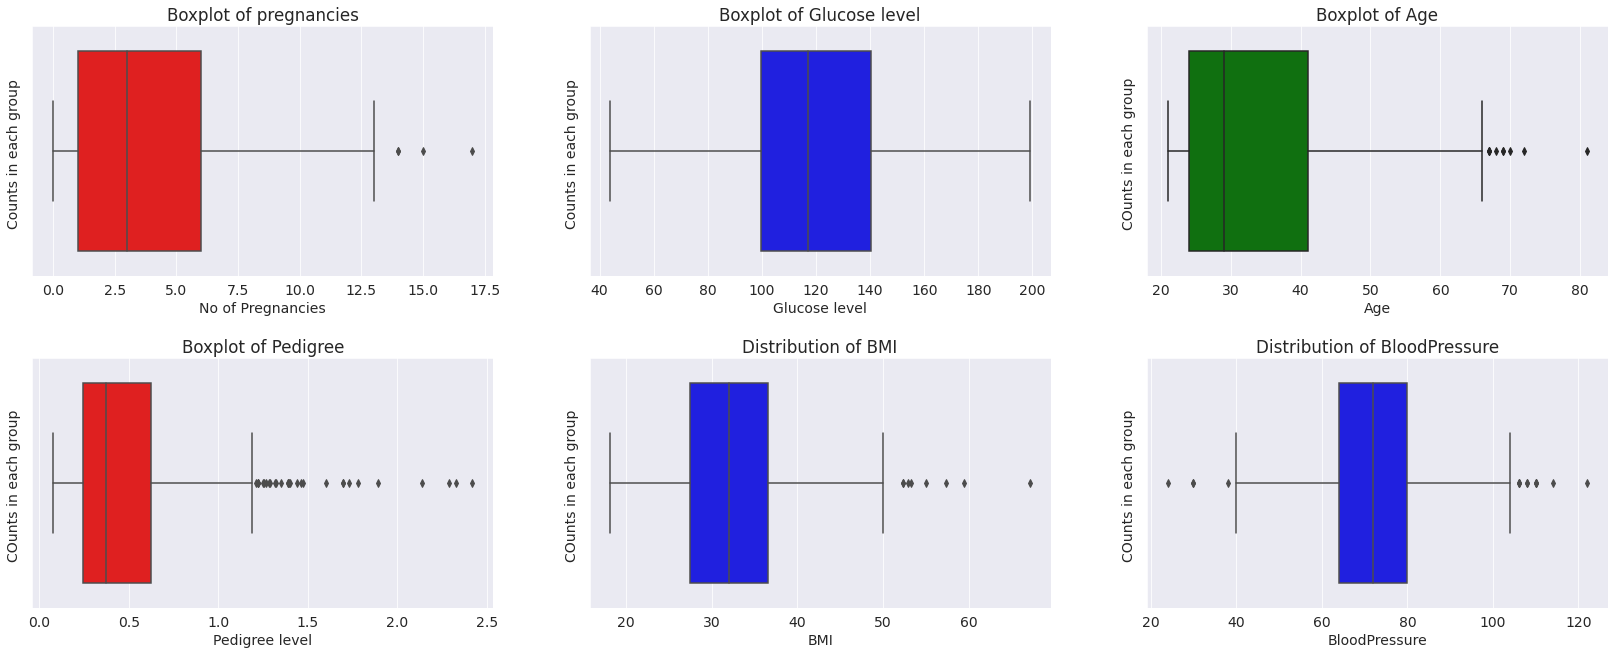

In [ ]:
fig, axes = plt.subplots(2,3, figsize= (24,10))
plt.tight_layout(pad = 4)

axes[0,0].set_title('Boxplot of pregnancies')
sns.boxplot(diabetes2["Pregnancies"], color = 'r', ax= axes[0,0])
axes[0,0].set_xlabel('No of Pregnancies')
axes[0,0].set_ylabel('Counts in each group ')

axes[0,1].set_title('Boxplot of Glucose level')
sns.boxplot(diabetes2["Glucose"], color= 'b', ax = axes[0,1])

axes[0,1].set_xlabel('Glucose level')
axes[0,1].set_ylabel('Counts in each group ')


axes[0,2].set_title('Boxplot of Age')
sns.boxplot(diabetes2["Age"], color= 'g', ax = axes[0,2])
axes[0,2].set_xlabel('Age')
axes[0,2].set_ylabel('COunts in each group ')

axes[1,0].set_title('Boxplot of Pedigree')
sns.boxplot(diabetes2["DiabetesPedigreeFunction"] , color= 'r', ax = axes[1,0])
axes[1,0].set_xlabel('Pedigree level')
axes[1,0].set_ylabel('COunts in each group ')

axes[1,2].set_title('Distribution of BloodPressure')
sns.boxplot(diabetes2["BloodPressure"], color= 'b', ax = axes[1,2])
axes[1,2].set_xlabel('BloodPressure')
axes[1,2].set_ylabel('COunts in each group ')


axes[1,1].set_title('Distribution of BMI')
sns.boxplot(diabetes2["BMI"], color= 'b', ax = axes[1,1])
axes[1,1].set_xlabel('BMI')
axes[1,1].set_ylabel('COunts in each group ')

# This shows the boxplot distribution of the columns that has some considerable correlation with the outcome column.

Text(597.8568181818181, 0.5, 'Counts in each group ')

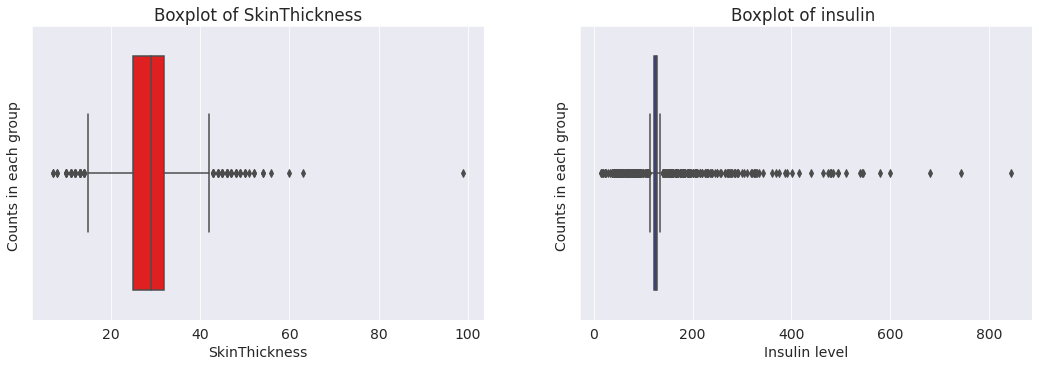

In [ ]:
fig, axes = plt.subplots(1,2, figsize= (16,6))
plt.tight_layout(pad = 4)


axes[0].set_title('Boxplot of SkinThickness')
sns.boxplot(diabetes2["SkinThickness"], color = 'r', ax= axes[0])
axes[0].set_xlabel('SkinThickness')
axes[0].set_ylabel('Counts in each group ')

axes[1].set_title('Boxplot of insulin ')
sns.boxplot(diabetes2["Insulin"], color= 'b', ax = axes[1])

axes[1].set_xlabel('Insulin level')
axes[1].set_ylabel('Counts in each group ')



The new Insulin level seems to have great number of outliers though all of which are possible in extrteme cases and the distribution is squeezed at one point(median) as one-third of the values are at that point.

In [ ]:
correlationColumns = diabetes2.corr()
correlationColumns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543275,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180373,0.126503,0.097101,0.203790
BMI,0.021546,0.231400,0.281132,0.543275,0.180373,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312249,0.173844,0.238356,1.000000


This shows the correlation between the columns. From this feature we could have more idea about how each columns relates more to the outcome column. 

This does not mean that we are concluding that a considerable high correlation of a particular column determines **the** outcome(This is correlation not causation).

The correlation between the columns is showed below using an heatmap to give us more insights.

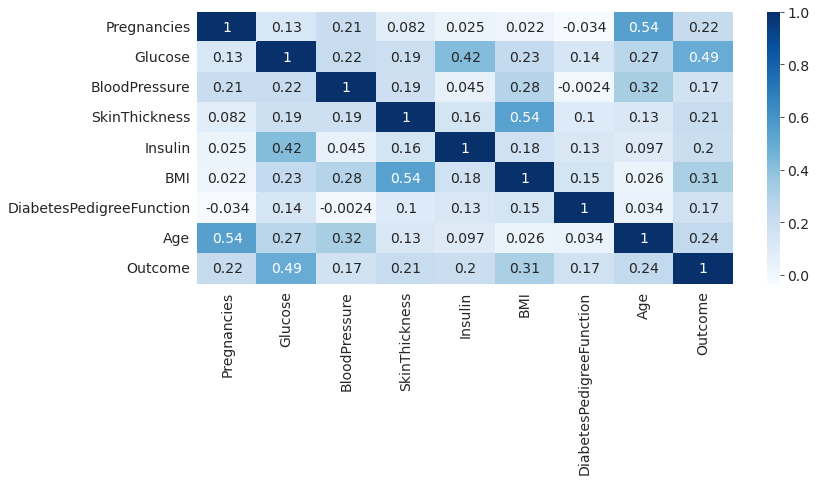

In [ ]:
sns.heatmap(correlationColumns, annot = True , cmap = 'Blues')

Next, We check the distribution of the columns with respect to the outcomes result

Text(655.5338235294118, 0.5, 'Counts in each group ')

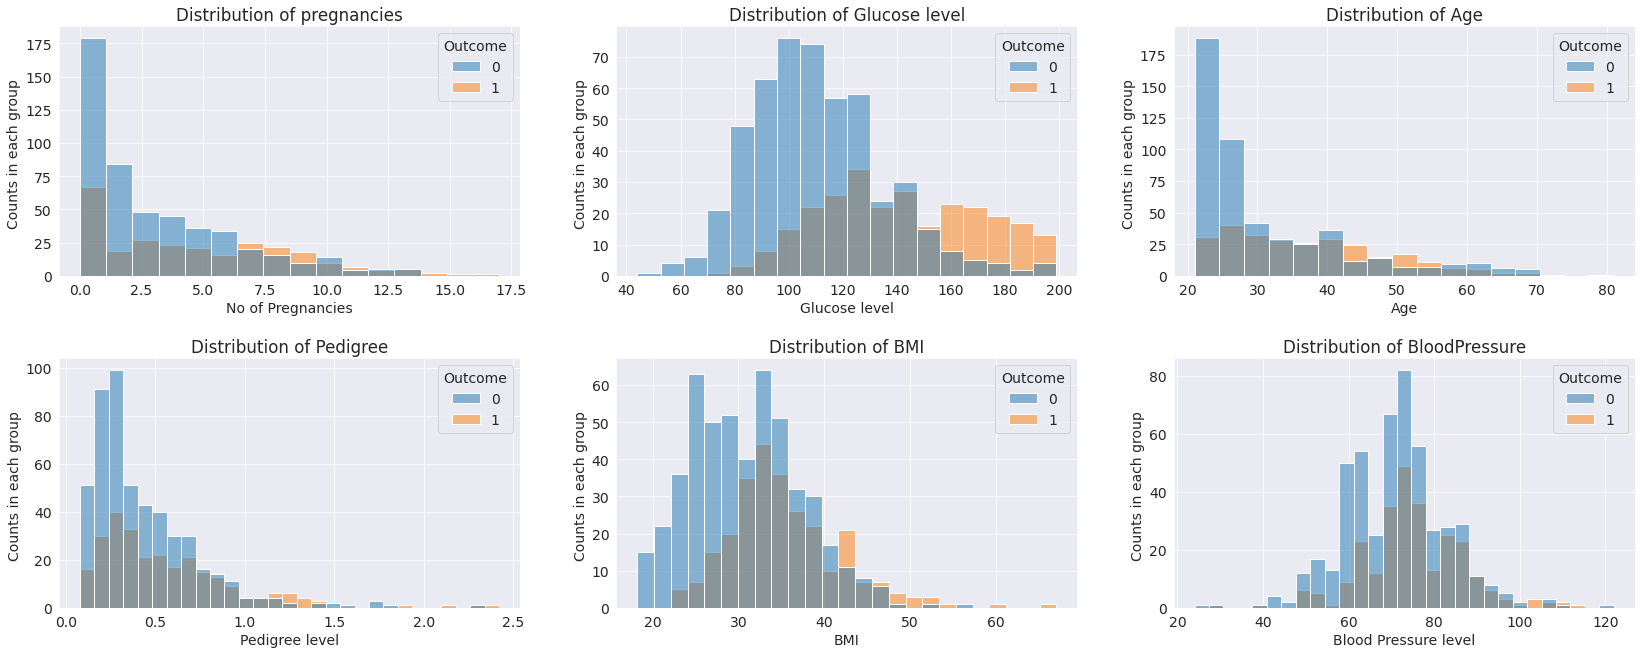

In [ ]:
fig, axes = plt.subplots(2,3, figsize= (24,10))
plt.tight_layout(pad = 4)

axes[0,0].set_title('Distribution of pregnancies')
sns.histplot(data = diabetes2, x= "Pregnancies", color= 'b', hue = "Outcome" , ax = axes[0,0])
axes[0,0].set_xlabel('No of Pregnancies')
axes[0,0].set_ylabel('Counts in each group ')

axes[0,1].set_title('Distribution of Glucose level')
sns.histplot(data = diabetes2, x= "Glucose", color= 'b', hue = "Outcome" , ax = axes[0,1])

axes[0,1].set_xlabel('Glucose level')
axes[0,1].set_ylabel('Counts in each group ')


axes[0,2].set_title('Distribution of Age')
sns.histplot(data = diabetes2, x= "Age", color= 'b', hue = "Outcome" ,ax = axes[0,2])
axes[0,2].set_xlabel('Age')
axes[0,2].set_ylabel('Counts in each group ')

axes[1,0].set_title('Distribution of Pedigree')
sns.histplot(data = diabetes2, x= "DiabetesPedigreeFunction" , color= 'b', hue = "Outcome", ax = axes[1,0])
axes[1,0].set_xlabel('Pedigree level')
axes[1,0].set_ylabel('Counts in each group ')


axes[1,2].set_title('Distribution of BloodPressure')
sns.histplot(data = diabetes2, x = "BloodPressure", color= 'b', hue = "Outcome", ax = axes[1,2])
axes[1,2].set_xlabel('Blood Pressure level')
axes[1,2].set_ylabel('Counts in each group ')
axes[1,1].set_title('Distribution of BMI')
sns.histplot(data = diabetes2, x = "BMI", color= 'b', hue = "Outcome", ax = axes[1,1])
axes[1,1].set_xlabel('BMI')
axes[1,1].set_ylabel('Counts in each group ')




This shows the the distribution of the columns with respect to the outcome column.

In this graph we are visualizing the dataset to see how the Oucomes are spread accros each columns.

From the above graph we could make the following assumptions:

1. Most diabetic patient have glucose level greater than 80


2. Most Diabetic Patient have BP levle greater than 60.


3. Pedigree level of Most Diabetic Patient is below 1.5

4. Most diabetic patient has BMI level greater than 24

5. Age can't be the only factor in determining that a person has diabetes because having diabetes is distributed accross all ages same applies to number of pregnancies.

6. people with high BMI level i.e obese and fat has high chance of being diabetic.

Text(913.3477272727271, 0.5, 'Counts in each group ')

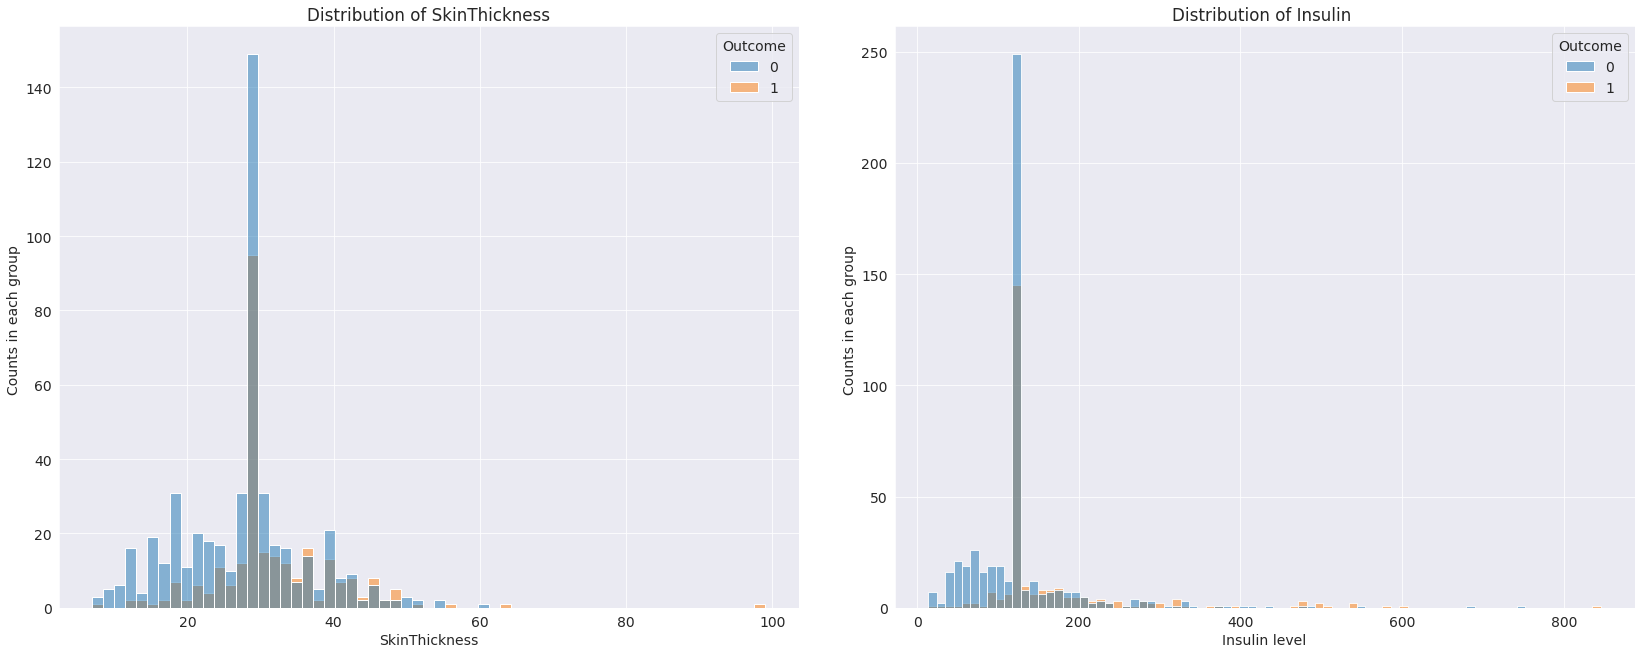

In [ ]:
fig, axes = plt.subplots(1,2, figsize= (24,10))
plt.tight_layout(pad = 4)


axes[0].set_title('Distribution of SkinThickness')
sns.histplot(data = diabetes2, x= "SkinThickness", color= 'b', hue = "Outcome" , ax = axes[0])

axes[0].set_xlabel('SkinThickness')
axes[0].set_ylabel('Counts in each group ')

axes[1].set_title('Distribution of Insulin ')
sns.histplot(data = diabetes2, x= "Insulin", color= 'b', hue = "Outcome" ,bins = 80, ax = axes[1])


axes[1].set_xlabel('Insulin level')
axes[1].set_ylabel('Counts in each group ')




Skin thickness does not give a direct indication of being diabetic as there's a spread of diabetic tendencies in all its interval and also the high rise of being diabetic at almost 30 skinthickness was as a result of one-fourth of the data being at that point.

Also, Insulin is spread over 50+ and the high rise of diabetic patient at approximately 150 insulin level was as a result of 0 replaced(1/3rd of the entries) by the median. 


In [ ]:
diabetes2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [ ]:
import time

CPU times: user 31.3 s, sys: 477 ms, total: 31.8 s
Wall time: 58.2 s


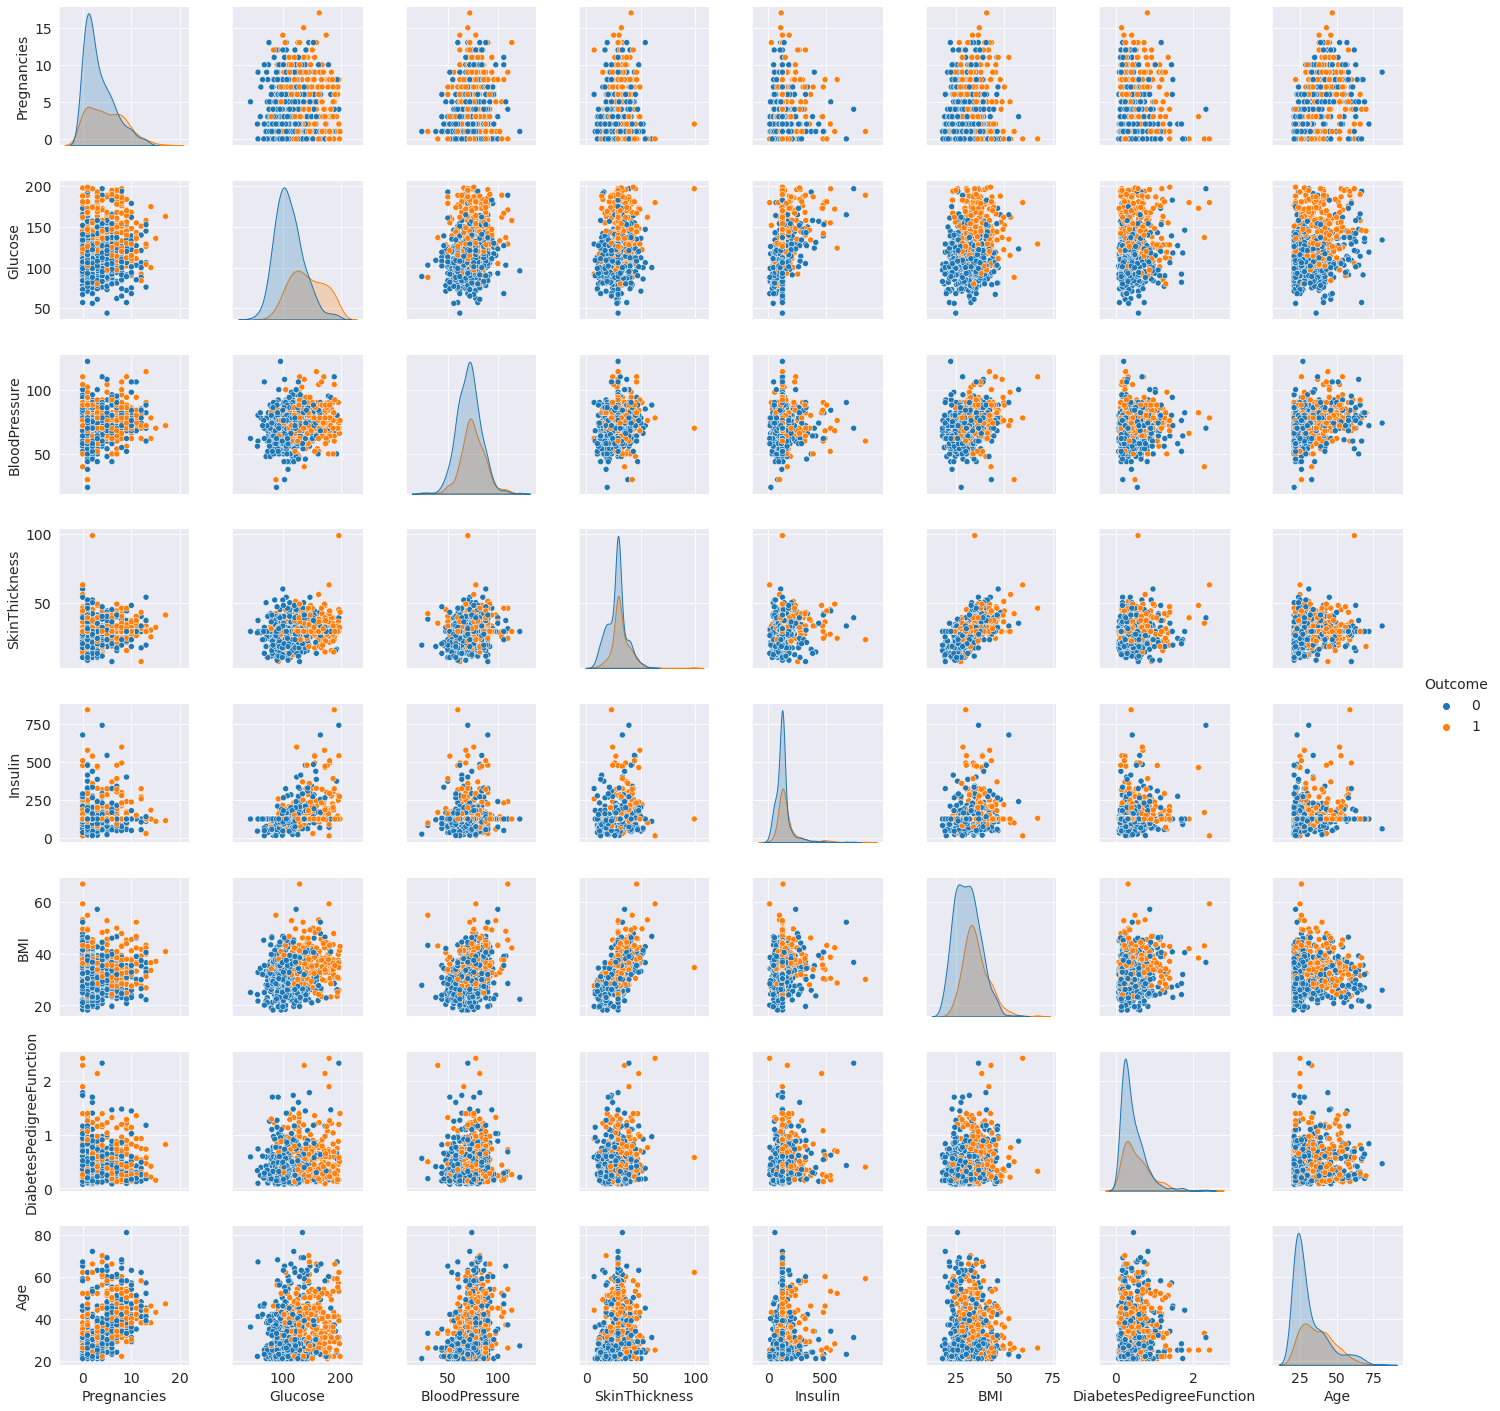

In [ ]:
%%time
sns.pairplot(diabetes2, hue = "Outcome")
# The aim of the pairplot is to pick the best ML algorithm in order for us to have a good prediction rate.

# CONCLUSIONS ON EXPLORATORY DATA ANALYSIS

In conclusion, We observed that most columns in the datasets have outliers although because these are medical parameters they can't be disregarded.

Also, each column in the dataset have reasonable correlation with the outcome and each has its weight in determining our outcome.

Hence, each columns are necessary in training our ML model.


# Training ML Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

'''imported necessary libraries for classification'''

'imported necessary libraries for classification'

In [ ]:
X = diabetes2.iloc[:, :-1]
y = diabetes2.iloc[:,-1].values


In [ ]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=.2, random_state = 0)


Since the values of the datas in the column are overly spread. it's best if we scale our datas.

In [ ]:
""" from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test) """

' from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.fit_transform(X_test) '

In [ ]:
""" from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test) """

' from sklearn.preprocessing import RobustScaler\nsc = RobustScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.fit_transform(X_test) '

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

All 3 scaler above were tried but Only the MinMaxScaler gave the best accuracy for our data

In [ ]:
diabetes2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7
0,0.411765,0.688312,0.551020,0.239130,0.134615,0.347648,0.262169,0.550000
1,0.235294,0.344156,0.367347,0.173913,0.133413,0.204499,0.155850,0.016667
2,0.000000,0.785714,0.673469,0.282609,0.800481,0.697342,0.149018,0.033333
3,0.058824,0.422078,0.326531,0.152174,0.145433,0.143149,0.322374,0.033333
4,0.470588,0.493506,0.489796,0.239130,0.133413,0.241309,0.044833,0.283333
...,...,...,...,...,...,...,...,...
609,0.588235,0.370130,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
610,0.411765,0.746753,0.428571,0.239130,0.133413,0.249489,0.130231,0.250000
611,0.235294,0.324675,0.418367,0.163043,0.133413,0.132924,0.029889,0.000000
612,0.647059,0.266234,0.510204,0.239130,0.133413,0.243354,0.094791,0.233333


In [ ]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7
0,0.076923,1.000000,0.589744,0.825,0.193606,0.711816,0.809256,0.022727
1,0.153846,0.333333,0.564103,0.500,0.149201,0.443804,0.190119,0.045455
2,0.307692,0.108696,0.410256,0.475,0.193606,0.455331,0.181989,0.090909
3,0.384615,0.760870,0.538462,0.225,0.282416,0.219020,0.304565,0.681818
4,0.000000,0.362319,0.448718,0.475,0.193606,0.184438,0.350219,0.227273
...,...,...,...,...,...,...,...,...
149,0.153846,0.318841,0.641026,0.875,0.310835,0.446686,0.382114,0.181818
150,0.307692,0.173913,0.358974,0.300,0.058615,0.276657,0.128831,0.159091
151,0.307692,0.586957,0.717949,0.475,0.193606,0.743516,0.340838,0.022727
152,0.230769,0.398551,0.564103,0.125,0.158082,0.233429,0.004378,0.068182


In [ ]:
error_rate = []
for i in range(1,50,2):
  model = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 2)
  model.fit(X_train, Y_train)
  y1_pred = model.predict(X_test)
  error_rate.append(np.mean(y1_pred != Y_test))

In [ ]:
error_rate3 = []
for i in range(1,50,2):
  model3 = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 1)
  model3.fit(X_train, Y_train)
  y2_pred = model3.predict(X_test)
  error_rate3.append(np.mean(y2_pred != Y_test))

In [ ]:
pd.DataFrame({"euclidean er": error_rate, "manhattan er": error_rate3})

,euclidean er,manhattan er
0,0.318182,0.324675
1,0.253247,0.279221
2,0.240260,0.279221
3,0.214286,0.259740
4,0.220779,0.214286
5,0.227273,0.214286
6,0.214286,0.220779
7,0.194805,0.214286
8,0.194805,0.207792
9,0.188312,0.214286


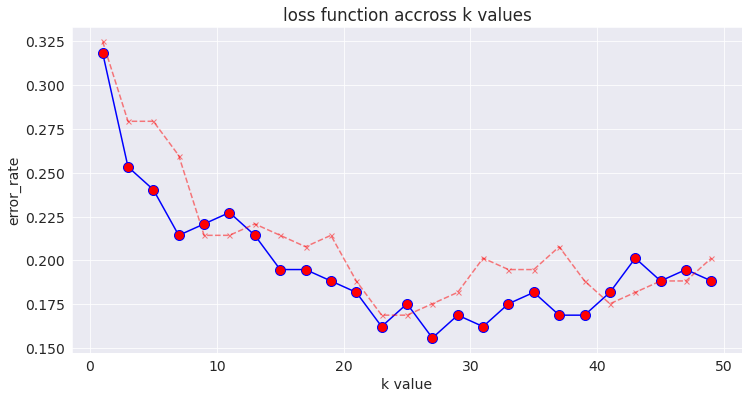

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50,2), error_rate, color ="blue", marker = "o", markerfacecolor= 'red', markersize = 10)
plt.title("loss function accross k values")
plt.ylabel("error_rate")
plt.xlabel("k value")

plt.plot(range(1,50,2), error_rate3, color ="red", marker = "x", linestyle = "dashed", markerfacecolor= 'blue', markersize = 5, alpha =.5)

From above we can see that k = 27 has the least error rate(i.e highest accuracy) using the euclidean distance as our metric.

In [ ]:
model2 = KNeighborsClassifier(n_neighbors= 27, metric = 'minkowski', p = 2)

In [ ]:
model2.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=27)

In [ ]:
y_pred = model2.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
Y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
cm = confusion_matrix(Y_test, y_pred, normalize = "true") 
cm

array([[0.90654206, 0.09345794],
       [0.29787234, 0.70212766]])

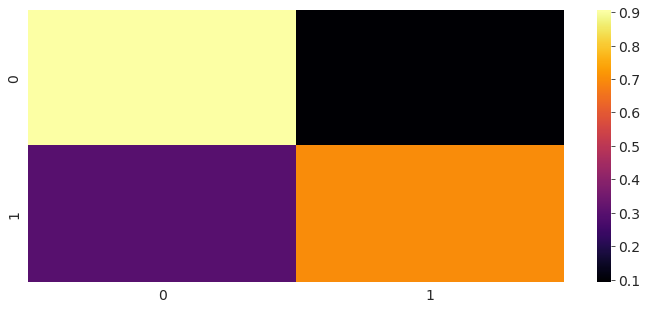

In [ ]:
sns.heatmap(cm, cmap="inferno")

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(Y_test,y_pred) * 100

84.4155844155844

Using SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
y1_pred = classifier.predict(X_test)
y1_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
cm2 = confusion_matrix(Y_test,y1_pred, normalize="true")
cm2

array([[0.88785047, 0.11214953],
       [0.38297872, 0.61702128]])

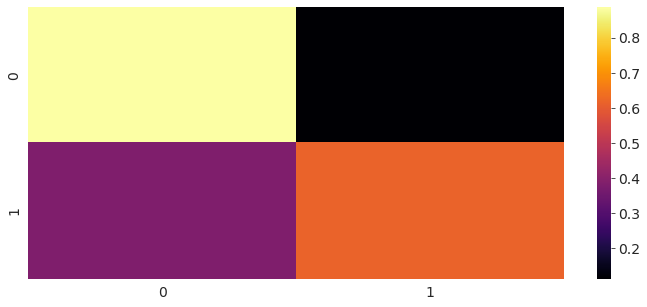

In [ ]:
sns.heatmap(cm2, cmap= "inferno")

In [ ]:
accuracy_score(Y_test,y1_pred)

0.8051948051948052

Our Model has an accuracy of ~84 % using the KNN while it has an accuracy of ~81% using the SVM model. while KNN seems to be the best model to give the most accurate score for our dataset also it has lower false negative and false positive. It's best we drop the SVM model because of the percentage of false positive and true negative which is not good for prediction.

Testing Inputed values

In [ ]:
new_input = {'Pregnancy': 2, 'Glucose' : 120, 'BloodPressure': 100, 'SkinThickness': 20, 'Insulin': 80, 'BMI': 30, 'DiabetesPedigreeFunction': 0.27, 'Age':50}

In [ ]:
new_input_df = pd.DataFrame([new_input])
new_input_df

,Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,120,100,20,80,30,0.27,50


In [ ]:
new_input_df = sc.transform(new_input_df)
new_input_df = pd.DataFrame(new_input_df)
new_input_df

,0,1,2,3,4,5,6,7
0,0.153846,0.427536,0.897436,0.25,0.113677,0.340058,0.106316,0.659091


In [ ]:
prediction = model.predict(new_input_df)

In [ ]:
prediction

array([0])